In [ ]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import sys
import random
sys.path.append("../") # go to parent dir

In [ ]:
data_root_dir = '../data/ODIR-5K_Training_Images/ODIR-5K_Training_Dataset'
img_paths = glob(f'{data_root_dir}/*.jpg')

In [59]:
def crop_nonzero(image):
    bbox = image.getbbox()
    cropped_image = image.crop(bbox)
    return cropped_image

# Custom transform for cropping non-zero regions
class CropNonzero(object):
    def __call__(self, image):
        return crop_nonzero(image)

In [ ]:
from PIL import Image
import os

def crop_nonzero(image_path, output_path):
    image = Image.open(image_path)
    bbox = image.getbbox()
    cropped_image = image.crop(bbox)
    cropped_image.save(output_path)
# input_folder = '../data/ODIR-5K_Testing_Images/ODIR-5K_Testing_Images'
# output_folder = '../data/cropped__testing_images_folder'
input_folder = '../data/ODIR-5K_Training_Images/ODIR-5K_Training_Dataset'
output_folder = '../data/cropped__training_images_folder'

# os.makedirs(output_folder, exist_ok=True)
# for filename in os.listdir(input_folder):
#     if filename.endswith(('.jpg')):
#         input_path = os.path.join(input_folder, filename)
#         output_path = os.path.join(output_folder, filename)
#         crop_nonzero(input_path, output_path)


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import Lambda


In [61]:
from torchvision import transforms as v2transforms
# Define transformations
transforms = v2transforms.Compose([
    v2transforms.Resize(size=(256,256)),
    CropNonzero(),
    v2transforms.ToTensor(),
    v2transforms.Normalize(mean=[0.0177, 0.0195, 0.0210], std=[0.2271,0.2271, 0.2271]),
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image Size: (1473, 1296)


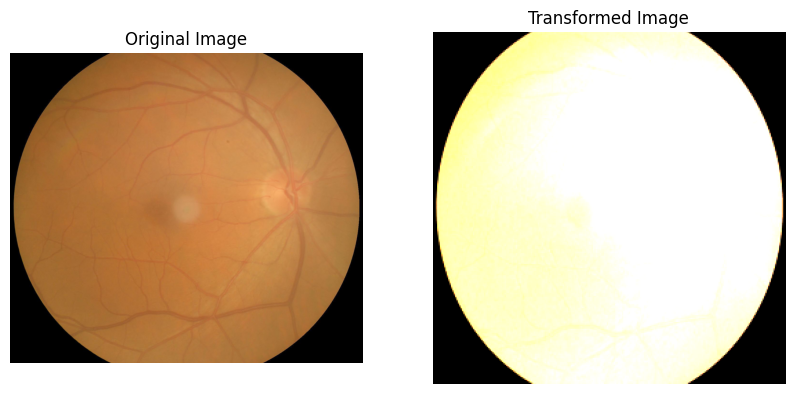

In [65]:
# Load the original image
original_image_path = '../data/cropped__training_images_folder/4690_right.jpg'  # Replace with the actual path to your image
original_image = Image.open(original_image_path)
image_size = original_image.size
print("Image Size:", image_size)
# Apply transformations
transformed_image = transforms(original_image)
# Convert the PyTorch tensor to a NumPy array and permute dimensions
transformed_image_np = transformed_image.permute(1, 2, 0).numpy()


# Display side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display original image
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Display transformed image
axs[1].imshow(transformed_image_np)
axs[1].set_title('Transformed Image')
axs[1].axis('off')

plt.show()